# Prueba 2 - Prueba de Aleatoriedad

> Estudiante: Eduardo Zhizhpon <br/>
> Fecha: 25/05/2022

### Importación de blbliotecas

In [43]:
import numpy as np
import random
import matplotlib.pyplot as plt

### Definición de funciones

In [99]:
"""
    Generador de Cuadrados Medios
"""
def mean_squares(xo, digits, iterations):
    xn = xo
    rn_list = []
    for i in range(iterations):
        xnn = xn**2
        txnn = str(xnn).zfill(8)
        tam = len(txnn)
        ui = int(txnn[int(tam/2-digits/2):int(tam/2+digits/2)])
        rn = ui / (int('9'*digits)+1)
        rn_list.append(rn)
        xn = ui
    return rn_list

""" 
    Generador de Congruencia Lineal
"""
def linear_congruence(xo, a, b, m, iterations):
    xn = xo
    rn_list = []
    for i in range(iterations):
        xnn = (a*xn+b) % m
        ui = xnn/m
        rn_list.append(ui)
        xn = xnn
    return rn_list

"""
    Generador Tausworthe
"""
""" Generador Tausworthe - Obtiene los segmentos de bits """
def get_bits(b, current_idx, l):
    n = len(b)
    end_idx = current_idx + l
    next_idx = end_idx
    remaining = end_idx - n if end_idx > n else None
    if remaining:
        bits = b[current_idx: n] + b[0:remaining]
        next_idx = remaining
    else:
        bits = b[current_idx: end_idx]
    if next_idx >= n:
        next_idx = 0
    return (bits, next_idx)

""" Generador Tausworthe - Generación del conjunto de bits (b) """
def generate_bits(q, r, b_seed):
    period = 2**q - 1
    b = b_seed
    for i in range(q, period):
        b_n = int(b[i - r]) ^ int(b[i - q])
        b += str(b_n)
    return b

""" Generador Tausworthe - Generación de números aleatorios """
def tausworthe(q, r, l, b_seed, iterations):
    b = generate_bits(q, r, b_seed)
    idx = 0
    rn_list = []
    for i in range(iterations):
        bits, idx = get_bits(b, idx, l)
        dec = int(bits, 2)
        rn = dec/2**l
        rn_list.append(rn)
    return rn_list

"""
    Generador Random de Python
"""
def random_python(seed, iterations):
    random.seed(seed)
    return [random.random() for i in range(iterations)]

def random_test(rn_list):
    co = 0
    last_n = None
    n0 = 0
    n1 = 0
    for rn in rn_list:
        n = None
        if rn >= 0.5:
            n = 1
            n1 += 1
        else:
            n = 0
            n0 += 1
        if last_n != n:
            co += 1
        last_n = n
    n = n0 + n1
    uc0 = (( 2 * n0 * n1 ) / ( n )) + (1/2)
    qc0 = ( 2 * (n0 * n1) * (2 * (n0 * n1) - n ) ) / ( n**2 * (n - 1) )
    z0 = (co - uc0) / (qc0 ** 0.5)
    return co, n0, n1, z0

def random_test_resolve(z0, z_alpha_2 = 1.96):
    if z0 > -z_alpha_2 and z0 < z_alpha_2:
        return f'Son independientes con Z = {z0} ' \
            f'y Z_alpha/2 = {z_alpha_2}'
    else:
        return f'No independientes con Z = {z0} ' \
            f'y Z_alpha/2 = {z_alpha_2}'

def plot_random_test(n0, n1, title='Title'):
    fig = plt.figure(figsize=(6,6))
    axes = fig.add_subplot(1, 1, 1)
    y = ['Cantidad de 0', 'Cantidad de 1']
    x = [n0, n1]
    axes.pie(x, labels=x, autopct='%1.1f%%')
    axes.set_title(title)
    axes.legend(y)
    plt.show()
    
#     rn_list = [1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 
#                0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 
#                1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 
#                1, 1, 1, 0, 0, 0, 1, 1]

### Generación de números pseudoaleatorios

In [7]:
iterations = 100

# Cuadrados medios
xo = 74731897457
digits = 7
mean_squares_rn = mean_squares(xo, digits, iterations)

# Congruencia lineal
xo = 7
a = 74731897457
b = 37747318974
m = 19
linear_congruence_rn = linear_congruence(xo, a, b, m, iterations)

# Random de python
seed = 1032022
random_python_rn = random_python(seed, iterations)

# Tausworthe
q = 15
r = 7
l = 7
b_seed = '1'*q
tausworthe_rn = tausworthe(q, r, l, b_seed, iterations)

### Pruebas de aletoriedad - Independencia

**Cuadrados medios**

c0 = 49 , n0 = 41 , n1 = 59 , z = 0.02493838832056819

Son independientes con Z = 0.02493838832056819 y Z_alpha/2 = 1.96


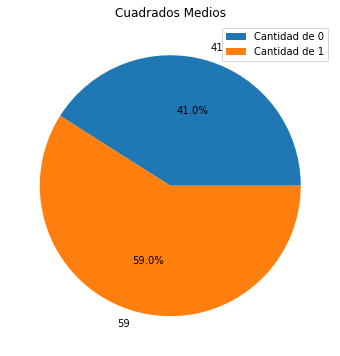

In [108]:
# Cuadrados medios
co, n0, n1, z0 = random_test(mean_squares_rn)
print('c0 =', co, ', n0 =', n0, ', n1 =', n1, ', z =', z0)
print()
print(random_test_resolve(z0))
plot_random_test(n0, n1, title='Cuadrados Medios')

**Congruencia Lineal**

co = 45 , n0 = 44 , n1 = 56 , z = -0.9750491625213825

Son independientes con Z = -0.9750491625213825 y Z_alpha/2 = 1.96


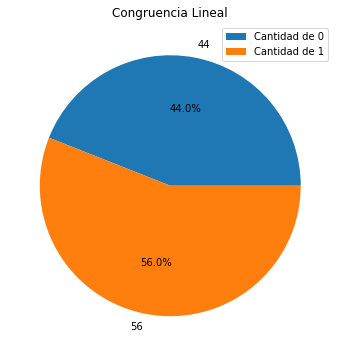

In [102]:
# Congruencia lineal
co, n0, n1, z0 = random_test(linear_congruence_rn)
print('c0 =', co, ', n0 =', n0, ', n1 =', n1, ', z =', z0)
print()
print(random_test_resolve(z0))
plot_random_test(n0, n1, title='Congruencia Lineal')

**Random de Python**

c0 = 46 , n0 = 57 , n1 = 43 , z = -0.7218758774415761

Son independientes con Z = -0.7218758774415761 y Z_alpha/2 = 1.96


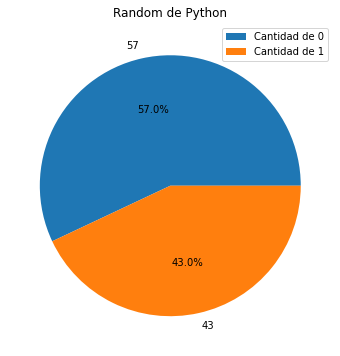

In [106]:
# Random de python
co, n0, n1, z0 = random_test(random_python_rn)
print('c0 =', co, ', n0 =', n0, ', n1 =', n1, ', z =', z0)
print()
print(random_test_resolve(z0))
plot_random_test(n0, n1, title='Random de Python')

**Tausworthe**

c0 = 48 , n0 = 42 , n1 = 58 , z = -0.25175237171777376

Son independientes con Z = -0.25175237171777376 y Z_alpha/2 = 1.96


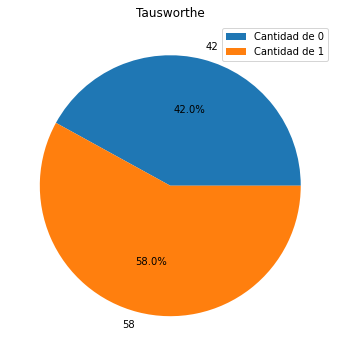

In [107]:
# Tausworthe
co, n0, n1, z0 = random_test(tausworthe_rn)
print('c0 =', co, ', n0 =', n0, ', n1 =', n1, ', z =', z0)
print()
print(random_test_resolve(z0))
plot_random_test(n0, n1, title='Tausworthe')

**Conclusión**

En conclusión, todos los generadores pasaron la prueba de aleatoriedad. A excepción de los números aleatorios generados con el módulo "random" de python, se puede observar que la cantidad de unos es superior a la de ceros.